In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1hvSlzsdCrv7m8VCSeQutWX_jlkonxlkP',
                                    dest_path='./Data_samples.zip',
                                    unzip=False)
file_name = 'Data_samples.zip'

In [0]:
! unzip -q -o $file_name

In [0]:
!ls

Data  Data_samples.zip	sample_data


#Importing and Testing the VGGish System

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset

In [0]:
!pip install resampy tensorflow-gpu==1.15.0 tf_slim six soundfile
#%tensorflow_version 1.x

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  
import librosa
import tensorflow as tf

In [0]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 34447 (delta 0), reused 0 (delta 0), pack-reused 34439
Receiving objects: 100% (34447/34447), 512.57 MiB | 33.21 MiB/s, done.
Resolving deltas: 100% (22252/22252), done.
Checking out files: 100% (2499/2499), done.


In [0]:
# Grab the VGGish model
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  60.3M      0  0:00:04  0:00:04 --:--:-- 83.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0   460k      0 --:--:-- --:--:-- --:--:--  460k


In [0]:
# Copy the source files to the current directory.
!cp -a models/research/audioset/. .
!cp vggish/* ./
!ls

Data		  vggish		    vggish_postprocess.py
Data_samples.zip  vggish_inference_demo.py  vggish_slim.py
mel_features.py   vggish_input.py	    vggish_smoke_test.py
models		  vggish_model.ckpt	    vggish_train_demo.py
README.md	  vggish_params.py	    yamnet
sample_data	  vggish_pca_params.npz


In [0]:
# Run the test, which also loads all the necessary functions.
import vggish_slim
import vggish_params
import vggish_input
from vggish_smoke_test import *

W0505 18:56:43.999326 139642713352064 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term



Testing your install of VGGish



W0505 18:56:45.424516 139642713352064 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1057: apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


Log Mel Spectrogram example:  [[-4.47297436 -4.29457354 -4.14940631 ... -3.9747003  -3.94774997
  -3.78687669]
 [-4.48589533 -4.28825497 -4.139964   ... -3.98368686 -3.94976505
  -3.7951698 ]
 [-4.46158065 -4.29329706 -4.14905953 ... -3.96442484 -3.94895483
  -3.78619839]
 ...
 [-4.46152626 -4.29365061 -4.14848608 ... -3.96638113 -3.95057575
  -3.78538167]
 [-4.46152595 -4.2936572  -4.14848104 ... -3.96640507 -3.95059567
  -3.78537143]
 [-4.46152565 -4.29366386 -4.14847603 ... -3.96642906 -3.95061564
  -3.78536116]]


W0505 18:56:45.544507 139642713352064 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


VGGish embedding:  [0.         0.         0.         0.         0.         0.
 0.         0.16137294 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.80695784
 0.         0.         0.         0.         0.         0.
 0.         0.36792755 0.03582418 0.         0.         0.
 0.         0.38027036 0.13755938 0.9174708  0.80656356 0.
 0.         0.         0.         0.04036269 0.7076244  0.
 0.4978391  0.24081807 0.21565425 0.884923   1.1956801  0.67061985
 0.2077946  0.01639876 0.17471859 0.         0.         0.25100812
 0.         0.         0.14607906 0.         0.39887053 0.30542108
 0.1289675  0.         0.         0.         0.         0.
 0.5385135  0.         0.         0.04941082 0.42527413 0.18537286
 0.         0.         0.1475353  0.         0.         0.6993387
 0.45541185 0.05174828 0.         0.01992539 0.         0.
 0.5181578  0.56557596 0.6587975  0.         0.         0.41056335
 0.         0.         0.         0.25765

In [0]:
def CreateVGGishNetwork(hop_size=0.96):   # Hop size is in seconds.
  """Define VGGish model, load the checkpoint, and return a dictionary that points
  to the different tensors defined by the model.
  """
  vggish_slim.define_vggish_slim()
  checkpoint_path = 'vggish_model.ckpt'
  vggish_params.EXAMPLE_HOP_SECONDS = hop_size
  
  vggish_slim.load_vggish_slim_checkpoint(sess, checkpoint_path)

  features_tensor = sess.graph.get_tensor_by_name(
      vggish_params.INPUT_TENSOR_NAME)
  embedding_tensor = sess.graph.get_tensor_by_name(
      vggish_params.OUTPUT_TENSOR_NAME)

  layers = {'conv1': 'vggish/conv1/Relu',
            'pool1': 'vggish/pool1/MaxPool',
            'conv2': 'vggish/conv2/Relu',
            'pool2': 'vggish/pool2/MaxPool',
            'conv3': 'vggish/conv3/conv3_2/Relu',
            'pool3': 'vggish/pool3/MaxPool',
            'conv4': 'vggish/conv4/conv4_2/Relu',
            'pool4': 'vggish/pool4/MaxPool',
            'fc1': 'vggish/fc1/fc1_2/Relu',
            'fc2': 'vggish/fc2/Relu',
            'embedding': 'vggish/embedding',
            'features': 'vggish/input_features',
         }
  g = tf.get_default_graph()
  for k in layers:
    layers[k] = g.get_tensor_by_name( layers[k] + ':0')
    
  return {'features': features_tensor,
          'embedding': embedding_tensor,
          'layers': layers,
         }

"""
THERE IS A VERSION TO GET EMBEDDINGS FROM EVERY LAYER BUT MAKES THE PROCESS TOO SLOW
THERE IS A VERSION FOR WHITENING AND COMPLIANCE WITH 8M-YOUTUBE FORMAT IN THE ORIGINAL NOTEBOOK
"""

def EmbeddingsFromVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a dictionary of embeddings from the different layers
  of the model.'''
  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])
  
  [embedding_batch] = sess.run([vgg['embedding']],
                               feed_dict={vgg['features']: input_batch})
    
  return embedding_batch

In [0]:
# Create VGGish model
HOP_SIZE = 0.01
tf.reset_default_graph()
sess = tf.Session()
vgg = CreateVGGishNetwork(HOP_SIZE)

#Using the VGGish System

### Test the VGGish model

In [38]:
SAMPLE_RATE = 16000
fname_f = './Data/LibriSpeech/train/sample/78/369/78-369-0045.flac'
x, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 3, offset= 7, res_type='kaiser_fast') # Chopping audio

x.shape

(48000,)

In [39]:
embedding_batch = EmbeddingsFromVGGish(vgg, x, sr)
print(embedding_batch.shape)
print(embedding_batch.min())
print(embedding_batch.max())

(203, 128)
0.0
1.8295795


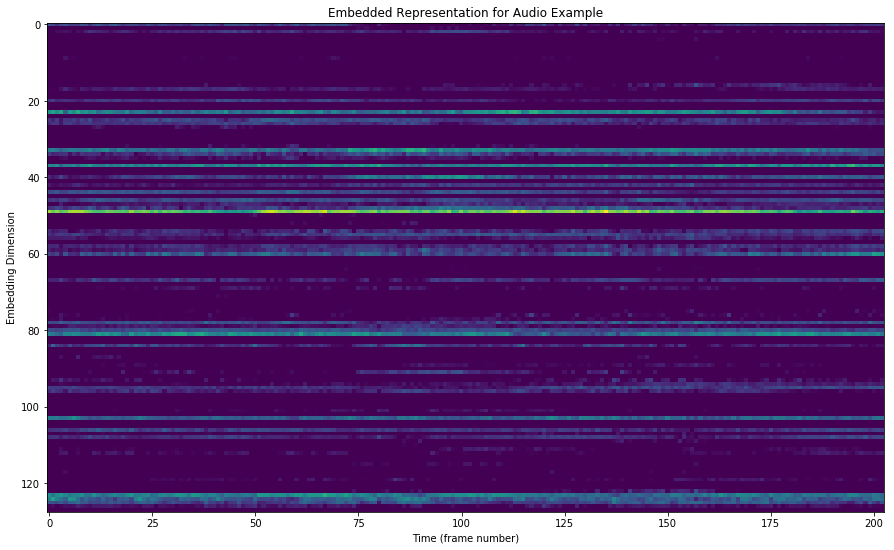

In [45]:
fig=plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')
plt.imshow(embedding_batch.T, 
           aspect='auto', cmap='viridis')
plt.ylabel('Embedding Dimension')
plt.xlabel('Time (frame number)')
plt.title('Embedded Representation for Audio Example')
plt.grid(False);

### Train set

In [0]:
# Get embeddings from our training set
train_tree = pd.read_csv('./Data/LibriSpeech/train/tree-sample.txt', 
                      names=['ID_reader', 'ID_chapter', 'Audio_file'],
                      sep='/',
                      header=None)
ipd.display(train_tree.head())
ipd.display(train_tree.shape)

,ID_reader,ID_chapter,Audio_file
0,103,1240,103-1240-0000.flac
1,103,1240,103-1240-0001.flac
2,103,1240,103-1240-0002.flac
3,103,1240,103-1240-0003.flac
4,103,1240,103-1240-0004.flac


(9070, 3)

In [0]:
SAMPLE_RATE = 16000
AUDIO_DURATION = 3
input_length_raw = int(SAMPLE_RATE * AUDIO_DURATION)

X_train = []
y_train = []

for index, row in train_tree.iterrows():
        file_path = './Data/LibriSpeech/train/sample/' + str(row['ID_reader']) + '/' + str(row['ID_chapter']) + '/' + str(row['Audio_file'])
        data, _ = librosa.core.load(file_path, sr=SAMPLE_RATE, res_type="kaiser_fast")
        n_segments = data.shape[0]//input_length_raw
        for j in range(n_segments):
            audio_segment = data[j*input_length_raw:(j+1)*input_length_raw]
            
            vggish_emb = EmbeddingsFromVGGish(vgg, audio_segment, SAMPLE_RATE)
            X_train.append(vggish_emb)

            y_train.append(row['ID_reader'])
X_train = np.array(X_train)
X_train = X_train[:,:,:,np.newaxis]
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(33346, 21, 128)
(33346,)


In [0]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

### Test set

In [0]:
# Get embeddings from our testing set
test_tree = pd.read_csv('./Data/LibriSpeech/val/tree-dev-clean.txt', 
                      names=['ID_reader', 'ID_chapter', 'Audio_file'],
                      sep='/',
                      header=None)

ipd.display(test_tree.head())
ipd.display(test_tree.shape)

,ID_reader,ID_chapter,Audio_file
0,1272,128104,1272-128104-0000.flac
1,1272,128104,1272-128104-0001.flac
2,1272,128104,1272-128104-0002.flac
3,1272,128104,1272-128104-0003.flac
4,1272,128104,1272-128104-0004.flac


(2703, 3)

In [0]:
SAMPLE_RATE = 16000
AUDIO_DURATION = 3
input_length_raw = int(SAMPLE_RATE * AUDIO_DURATION)

X_test = []
y_test = []

for index, row in test_tree.iterrows():
        file_path = './Data/LibriSpeech/val/dev-clean/' + str(row['ID_reader']) + '/' + str(row['ID_chapter']) + '/' + str(row['Audio_file'])
        data, _ = librosa.core.load(file_path, sr=SAMPLE_RATE, res_type="kaiser_fast")
        n_segments = data.shape[0]//input_length_raw
        for j in range(n_segments):
            audio_segment = data[j*input_length_raw:(j+1)*input_length_raw]
            
            vggish_emb = EmbeddingsFromVGGish(vgg, audio_segment, SAMPLE_RATE)
            X_test.append(vggish_emb)

            y_test.append(row['ID_reader'])
X_test = np.array(X_test)
X_test = X_test[:,:,:,np.newaxis]
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(5067, 21, 128)
(5067,)


In [0]:
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [0]:
!cp X_train.npy '/content/drive/My Drive/DLAS/'
!cp y_train.npy '/content/drive/My Drive/DLAS/'
!cp X_test.npy '/content/drive/My Drive/DLAS/'
!cp y_test.npy '/content/drive/My Drive/DLAS/'